In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## norb: number of orbitals
## nw: Number of imaginary Matsubara frequencies
## nw_out: How many frequencies do you want on the real axis?
## emin, emax: The frequency range on the real axis
## inf: The filename of your Matsubara Green's function 
def pade_analytic_continuation(nw_out, emin, emax, inf):
    wn = np.load(inf)['iwn']
    inf_data = np.load(inf)['Gloc']
    inf_data = inf_data[np.imag(wn) > 0]
    wn = wn[np.imag(wn) > 0]
    
    nw = len(wn)
    norb = 1
    if (len(inf_data.shape) == 2):
        norb = inf_data.shape[1]
    
    de = (emax-emin)/nw_out
    delta = 0.000000001

    gf = np.zeros((norb,nw),dtype=complex)
    if norb == 1:
        #gf[0] = np.imag(inf_data)
        gf[0] = inf_data
    else:
        for m in range(norb):
            #gf[m] = np.imag(inf_data[:, m])
            gf[m] = inf_data[:, m]

    # pade
    pmatrix = np.zeros((norb,nw,nw),dtype=complex)
    for m1 in range(norb):
        for n in range(nw):
            pmatrix[m1,0,n] = gf[m1,n]

        for m in range(1,nw):
            for n in range(1,m+1):
                if ( abs(pmatrix[m1,n-1,m]) < delta ):
                    continue
                pmatrix[m1,n,m] = ( pmatrix[m1,n-1,n-1] - pmatrix[m1,n-1,m] ) / ( pmatrix[m1,n-1,m]*( wn[m]-wn[n-1] ) )

    out = np.zeros((nw_out, 1 + norb), dtype=complex)
    for nn in range(nw_out):
        w = emin + nn*de
        out[nn][0] = w

        for m1 in range(norb):

            # find good n
            nstart = 0
            for m in range(nw):
                if ( abs(pmatrix[m1,m,m])<delta ):
                    break
                nstart += 1
            nstart = min(nstart,nw-1)
            nstart = nw-1

            val = 1.0 + pmatrix[m1,nstart,nstart]*( w - wn[nstart-1] )
            for m in range(nstart-1,0,-1):
                val = 1.0 + pmatrix[m1,m,m]*( w - wn[m-1] )/val
            val = pmatrix[m1,0,0]/val
            
            
            #outf.write(str(val.real) + '\t' + str(val.imag) + '\t')
            out[nn][1 + m1] = val

        #outf.write( '\n')
    #outf.close()
    
    return out

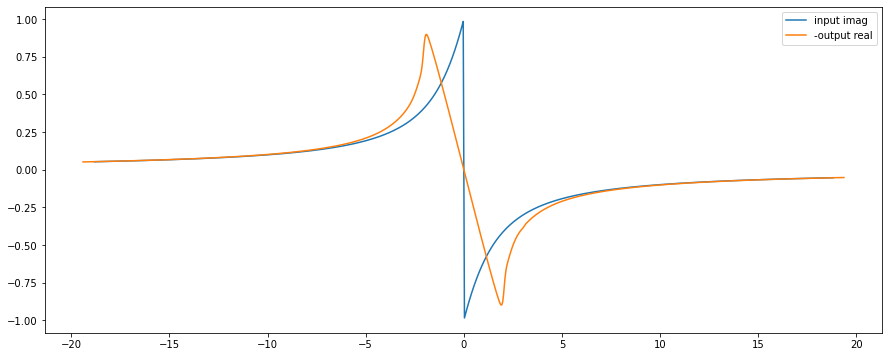

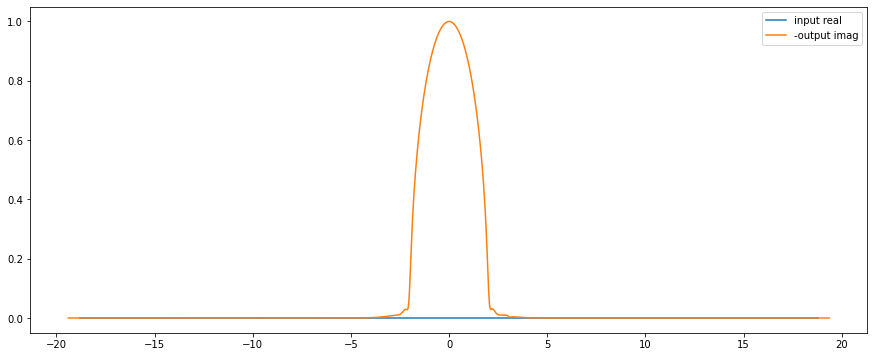

In [11]:
nw_out = 1000
emin = -19.4
emax = 19.4
inf = 'data_bethe_decreasingU_sym_noRe/U0.5-beta100.npz'

out = pade_analytic_continuation(nw_out, emin, emax, inf)
inf_data = np.load(inf)['Gloc']
iwn = np.load(inf)['iwn']
plt.figure(figsize=(15, 6))
plt.plot(iwn.imag, inf_data.imag, label='input imag')
plt.plot(out[:, 0].real, -out[:, 1].real, label='-output real')


plt.legend()

plt.figure(figsize=(15, 6))
plt.plot(iwn.imag, inf_data.real, label='input real')
plt.plot(out[:, 0].real, -out[:, 1].imag, label='-output imag')
plt.legend()

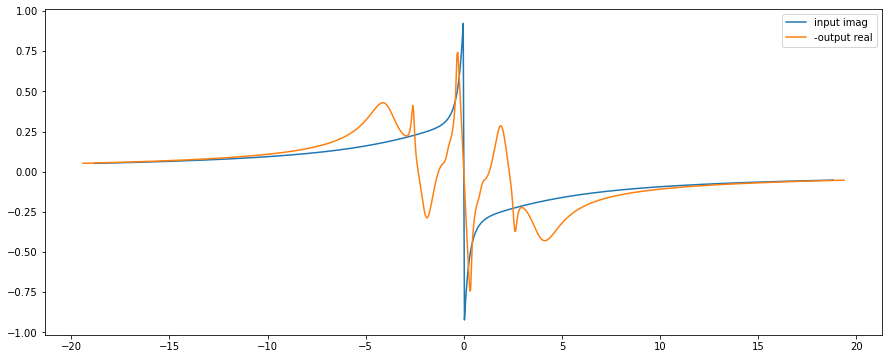

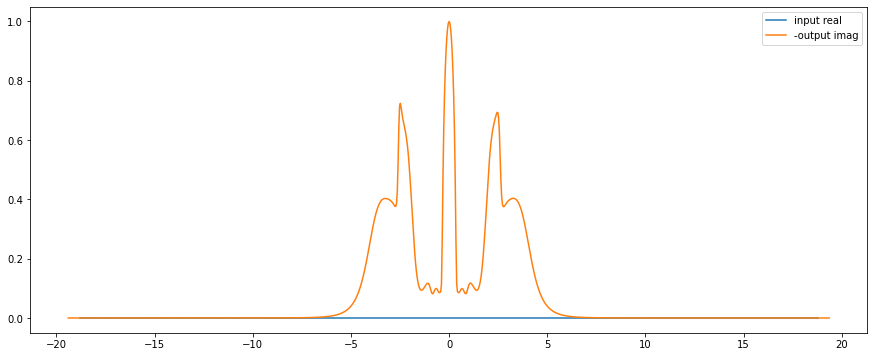

In [17]:
nw_out = 1000
emin = -19.4
emax = 19.4
inf = 'data_bethe_decreasingU_sym_noRe/U5.0-beta100.npz'

out = pade_analytic_continuation(nw_out, emin, emax, inf)
inf_data = np.load(inf)['Gloc']
iwn = np.load(inf)['iwn']
plt.figure(figsize=(15, 6))
plt.plot(iwn.imag, inf_data.imag, label='input imag')
plt.plot(out[:, 0].real, -out[:, 1].real, label='-output real')
plt.legend()

plt.figure(figsize=(15, 6))
plt.plot(iwn.imag, inf_data.real, label='input real')

plt.plot(out[:, 0].real, -out[:, 1].imag, label='-output imag')
plt.legend()

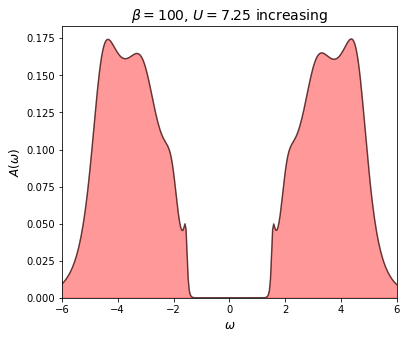

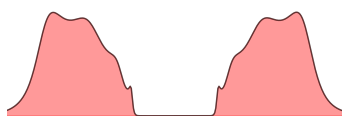

In [200]:
nw_out = 1000
emin = -19.4
emax = 19.4
beta = 100
U = 7.25
code = 'in'
filename = 'U' + str(U) + '-beta' + str(beta)
inf = 'data_bethe_' + code + 'creasingU_sym_noRe/' + filename + '.npz'
ouf = 'DOS/data/' + code + 'creasing' + filename + '.npy'
out_img = 'DOS/fig/' + code + 'creasing' + filename + '.pdf'
out_phase_img = 'DOS/phasefig/' + code + 'creasing' + filename + '.pdf'

out = pade_analytic_continuation(nw_out, emin, emax, inf)
np.save(ouf, out)

plt.figure(figsize=(6, 5))
#plt.fill_between(out[:, 0].real, -out[:, 1].imag/np.pi, edgecolor='black', facecolor=(1,1,0,.5))
plt.plot(out[:, 0].real, -out[:, 1].imag/np.pi, color='black', alpha=0.6)
plt.fill_between(out[:, 0].real, -out[:, 1].imag/np.pi, color='red', alpha=0.4)
plt.xlim(-6, 6)
plt.ylim(bottom=0)
plt.xlabel(r'$\omega$', fontsize=12)
plt.ylabel(r'$A(\omega)$', fontsize=12)
plt.title(r'$\beta = {}$, $U = {}$ {}'.format(beta, U, code + 'creasing'), fontsize=14)
plt.savefig(out_img, bbox_inches='tight')

plt.figure(figsize=(6, 2))
plt.plot(out[:, 0].real, -out[:, 1].imag/np.pi, color='black', alpha=0.6)
plt.fill_between(out[:, 0].real, -out[:, 1].imag/np.pi, color='red', alpha=0.4)
plt.xlim(-6, 6)
plt.ylim(bottom=0)
plt.xlabel(r'$\omega$', fontsize=12)
plt.ylabel(r'$A(\omega)$', fontsize=12)
plt.axis('off')
#plt.title(r'$\beta = {}$, $U = {}$ {}'.format(beta, U, code + 'creasing'), fontsize=14)
plt.savefig(out_phase_img, bbox_inches='tight')

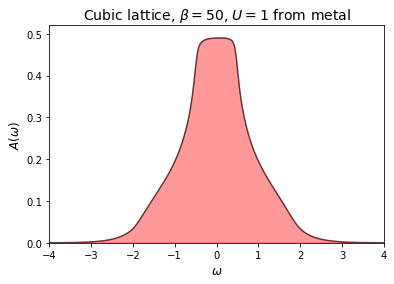

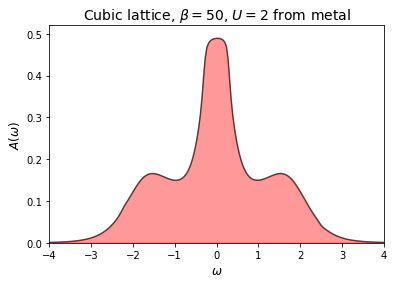

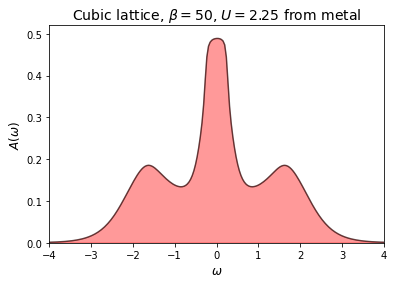

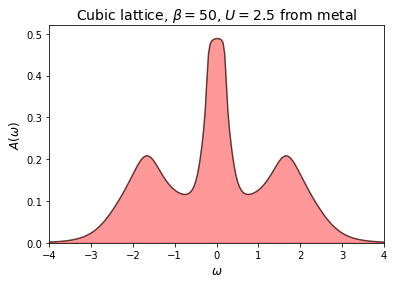

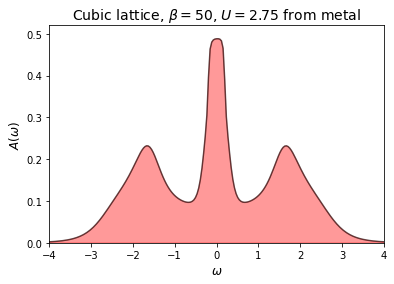

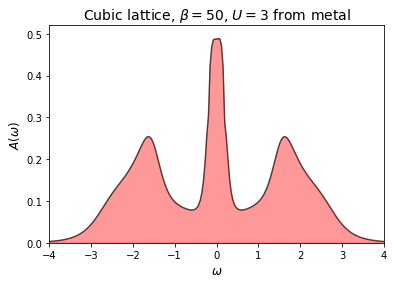

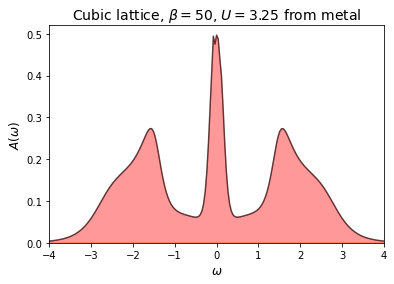

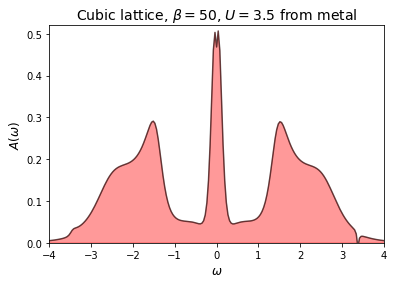

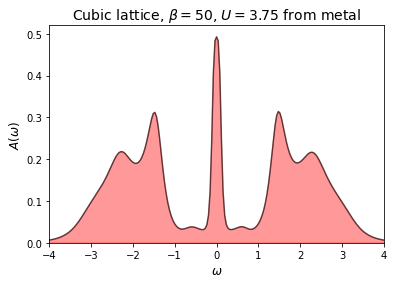

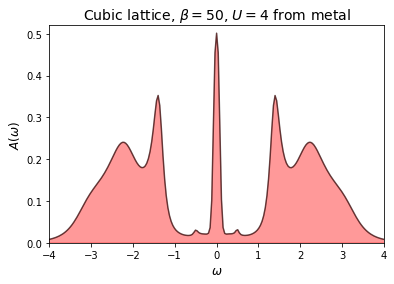

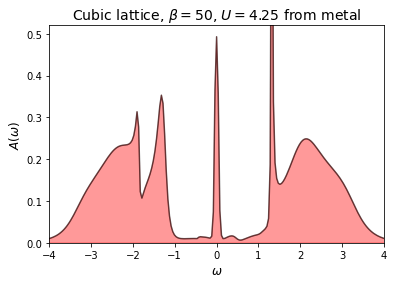

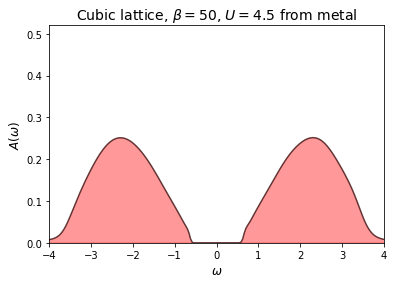

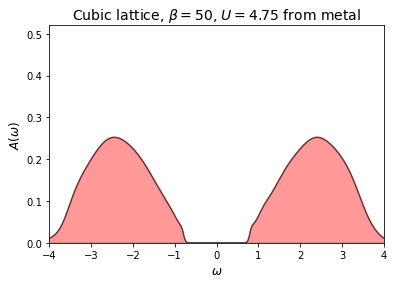

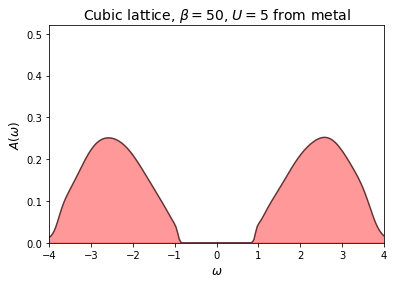

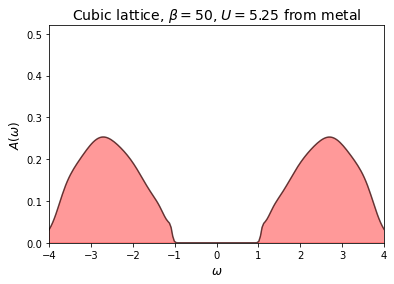

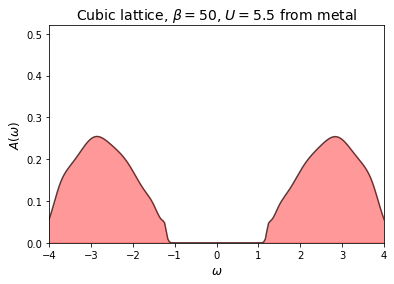

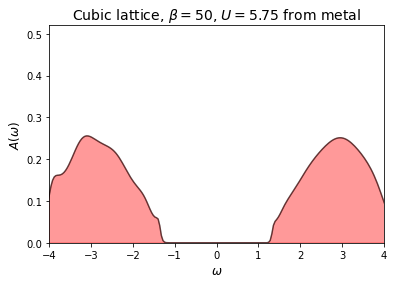

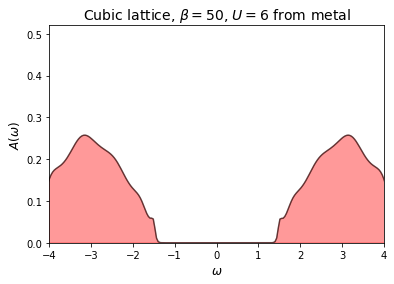

In [36]:
nw_out = 1000
emin = -19.4
emax = 19.4
beta = 50
for U in [1,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,5.75,6]:
    filename = 'U' + str(U) + '-beta' + str(beta)
    inf = 'data_cubic_from_metal/' + filename + '.npz'
    out_img = 'data_cubic_from_metal/' + filename + '.dos.pdf'

    out = pade_analytic_continuation(nw_out, emin, emax, inf)

    plt.figure(figsize=(6,4))
    plt.plot(out[:, 0].real, -out[:, 1].imag/np.pi, color='black', alpha=0.6)
    plt.fill_between(out[:, 0].real, -out[:, 1].imag/np.pi, color='red', alpha=0.4)
    plt.xlim(-4, 4)
    plt.ylim(0, 0.52)
    plt.xlabel(r'$\omega$', fontsize=12)
    plt.ylabel(r'$A(\omega)$', fontsize=12)
    plt.title(r'Cubic lattice, $\beta = {}$, $U = {}$ from metal'.format(beta, U), fontsize=14)
    plt.savefig(out_img, bbox_inches='tight')